# 📊 Customer Churn Analysis & Prediction

## Project Overview
Customer churn is a critical business problem for telecom companies.
This project analyzes customer behavior and builds a machine learning model
to predict whether a customer will churn.

### Objectives
- Explore customer data and identify churn patterns
- Visualize key insights
- Build a predictive model
- Provide business recommendations


In [28]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [29]:
# Load dataset
df = pd.read_csv("../data/churn.csv")

# Preview data
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
# Basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [31]:
# Statistical summary
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [32]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 📊 Data Overview

This dataset contains customer information from a telecom company.
The goal is to analyze customer behavior and build a model to predict churn.


In [33]:
df['Churn'].value_counts(normalize=True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

## 6. Exploratory Data Analysis (EDA)

In this section, we explore the dataset to understand **patterns behind customer churn**.
We focus on key numerical features that often influence churn, such as:
- **tenure** (customer lifetime)
- **MonthlyCharges**
- **TotalCharges**

In [34]:
# Basic overview
df.shape, df.columns


((7043, 21),
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
        'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
       dtype='object'))

### 6.1 Churn Distribution
We start by checking the overall churn rate to understand whether the dataset is balanced or imbalanced.
This helps in selecting appropriate evaluation metrics later.

In [35]:
df['Churn'].value_counts(normalize=True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

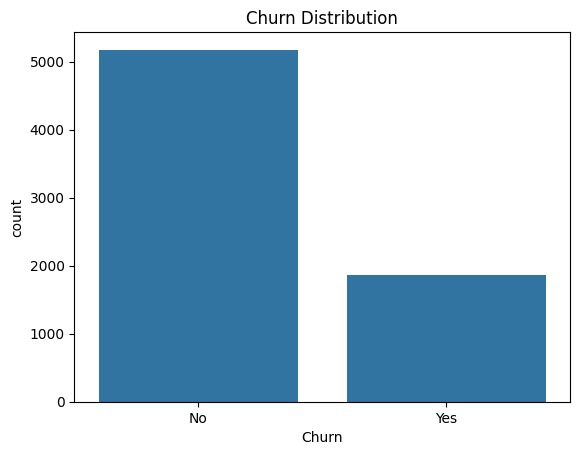

In [36]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


### 6.2 Tenure vs Churn
We analyze whether customers with shorter tenure are more likely to churn.
Usually, churn happens more in the early months of subscription.

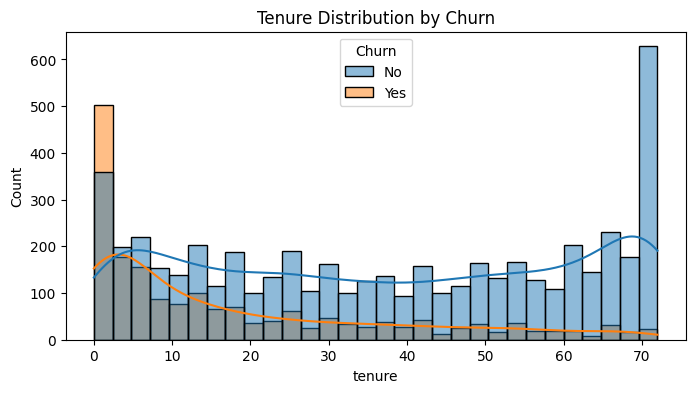

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True)
plt.title("Tenure Distribution by Churn")
plt.show()



### 6.3 Monthly Charges vs Churn
We check if customers with higher monthly charges tend to churn more.
This can indicate pricing sensitivity.

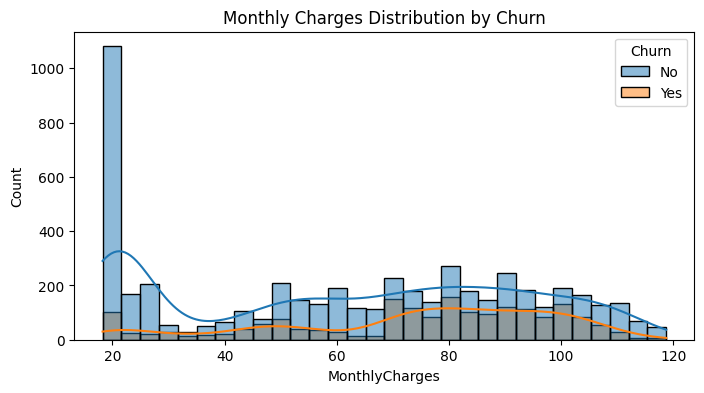

In [38]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=30, kde=True)
plt.title("Monthly Charges Distribution by Churn")
plt.show()


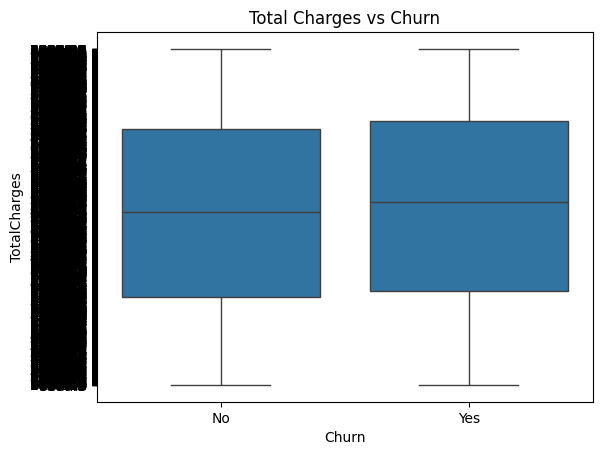

In [39]:
sns.boxplot(x="Churn", y="TotalCharges", data=df)
plt.title("Total Charges vs Churn")
plt.show()


### 6.4 Total Charges vs Churn
We explore total charges to see how customer lifetime value differs between churned and retained customers.
This feature is often related to tenure as well.


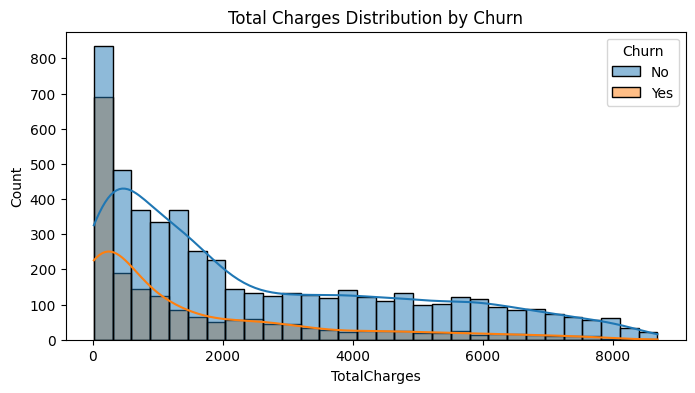

In [40]:
# If TotalCharges is object (string), convert it safely
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

plt.figure(figsize=(8,4))
sns.histplot(data=df, x='TotalCharges', hue='Churn', bins=30, kde=True)
plt.title("Total Charges Distribution by Churn")
plt.show()


### 6.5 Correlation Heatmap (Numeric Features)
We visualize correlations between numerical features to detect strong relationships
(e.g., **tenure** vs **TotalCharges**) which can affect modeling decisions.


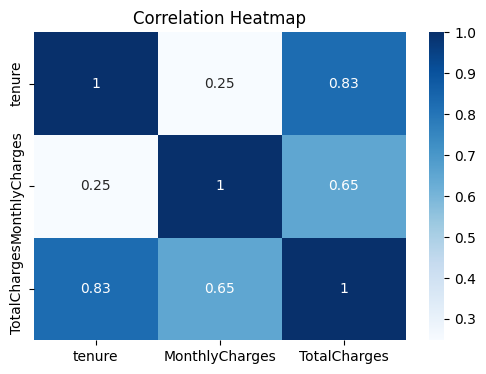

In [41]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()


### 6.6 EDA Summary
Key observations from EDA will guide the modeling step:
- Customers with **short tenure** tend to churn more.
- Higher **MonthlyCharges** may be associated with churn.
- **TotalCharges** often increases with tenure, so both should be considered carefully in modeling.


## 7. Data Preprocessing

Before building the model, we prepare the data by:
- Encoding categorical variables
- Scaling numerical features
- Splitting the dataset into training and testing sets


In [42]:
# Encode target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


### 7.1 Encoding Categorical Features
We convert categorical variables into numerical format using one-hot encoding
to make them suitable for machine learning models.


In [43]:
# Drop customerID if exists
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

# One-hot encoding
df = pd.get_dummies(df, drop_first=True)


### 7.2 Train-Test Split
We split the dataset into training and testing sets to evaluate model performance
on unseen data.


In [44]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


### 7.3 Feature Scaling
We scale numerical features to improve model convergence and performance,
especially for distance-based algorithms.


In [45]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 8. Model Training

We start with **Logistic Regression**, a simple and interpretable baseline model
commonly used for binary classification problems like churn prediction.


In [46]:
model = LogisticRegression(max_iter=1000)


from sklearn.impute import SimpleImputer

# 1) Identify numeric / categorical columns BEFORE get_dummies (if still available)
# If you already used get_dummies and everything is numeric, we'll impute all columns.

# Safety: ensure X is numeric after encoding
X = X.apply(pd.to_numeric, errors='coerce')

# 2) Impute missing values in X_train and X_test using median
imputer = SimpleImputer(strategy="median")

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# 3) Scale after imputing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

model.fit(X_train_scaled, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

## Fix: Handling Missing Values (NaN)

Logistic Regression cannot train with missing values.
We will:
1. Check missing values
2. Impute (fill) numerical features with median
3. Impute categorical features with most frequent
4. Then scale and train the model

## Model Evaluation

After training the Logistic Regression model, we evaluate its performance
using:
- Classification Report
- Confusion Matrix


In [47]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_pred = model.predict(X_test_scaled)

# Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



### Confusion Matrix

The confusion matrix helps visualize how well the model distinguishes
between churned and non-churned customers.


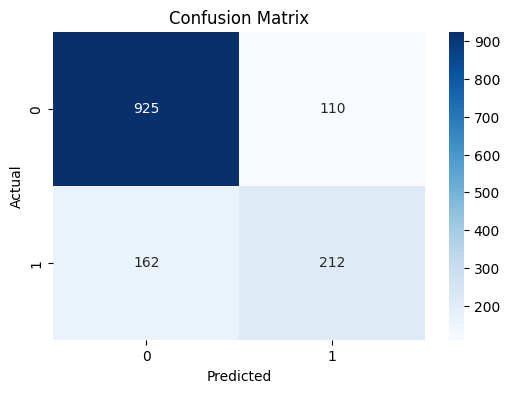

In [48]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt="d", cmap="Blues")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Feature Importance

Logistic Regression coefficients indicate how each feature
affects the probability of customer churn.


In [49]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

feature_importance.head(10)


,Feature,Coefficient
10,InternetService_Fiber optic,0.778763
3,TotalCharges,0.497255
23,StreamingMovies_Yes,0.258654
21,StreamingTV_Yes,0.258042
9,MultipleLines_Yes,0.216358
26,PaperlessBilling_Yes,0.181833
28,PaymentMethod_Electronic check,0.181459
17,DeviceProtection_Yes,0.053625
0,SeniorCitizen,0.052902
29,PaymentMethod_Mailed check,0.033134


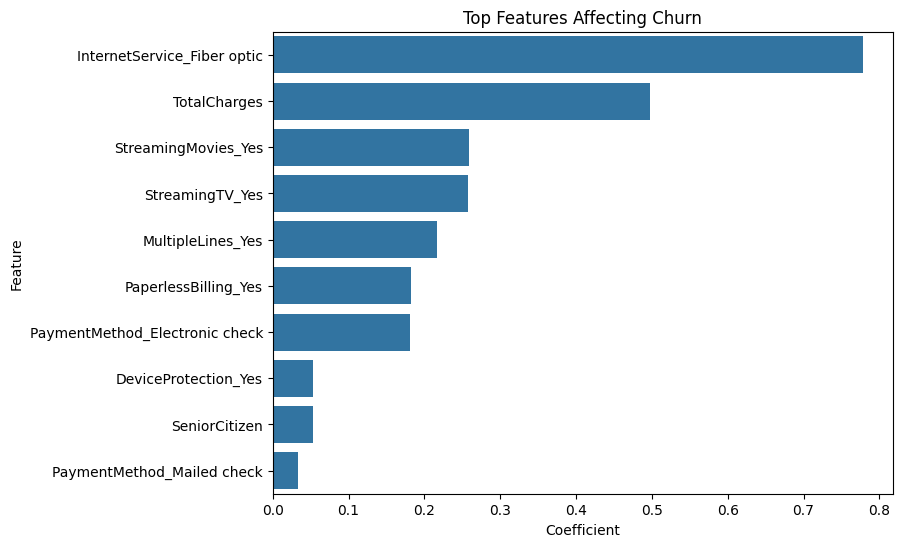

In [50]:
plt.figure(figsize=(8,6))
sns.barplot(data=feature_importance.head(10),
            x="Coefficient", y="Feature")
plt.title("Top Features Affecting Churn")
plt.show()


## Save Trained Model

The trained model is saved so it can be reused later
without retraining.


In [51]:
import joblib

joblib.dump(model, "../model/churn_model.pkl")
joblib.dump(scaler, "../model/scaler.pkl")
joblib.dump(imputer, "../model/imputer.pkl")


['../model/imputer.pkl']

## Conclusion

In this project, we built a complete machine learning pipeline to predict
customer churn:
- Cleaned and prepared the data
- Handled missing values
- Encoded and scaled features
- Trained a Logistic Regression model
- Evaluated performance
- Extracted business insights
- Saved the final model for deployment

This project demonstrates an end-to-end data analysis and machine learning workflow.
